In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from datetime import datetime   


In [91]:
def buscar_soporte_resistencia(precios_cierre,ventana_temporal):

    #Declaramos las listas de soporte y resistencia
    soporte , resistencia = [] , []

    for i_precio in range(ventana_temporal,len(precios_cierre) - ventana_temporal):

        if precios_cierre[i_precio] == max( precios_cierre[(i_precio - ventana_temporal) : (i_precio + ventana_temporal) ] ) :
            resistencia.append(precios_cierre[i_precio])

        if precios_cierre[i_precio] == min( precios_cierre[(i_precio - ventana_temporal) : (i_precio + ventana_temporal) ] ) :
            soporte.append(precios_cierre[i_precio])
            
    
    return soporte,resistencia

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12488\1393242086.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if precios_cierre[i_precio] == max( precios_cierre[(i_precio - ventana_temporal) : (i_precio + ventana_temporal) ] ) :
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12488\1393242086.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if precios_cierre[i_precio] == min( precios_cierre[(i_precio - ventana_temporal) : (i_precio + ventana_temporal) ] ) :
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12488\1393242086.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a futur

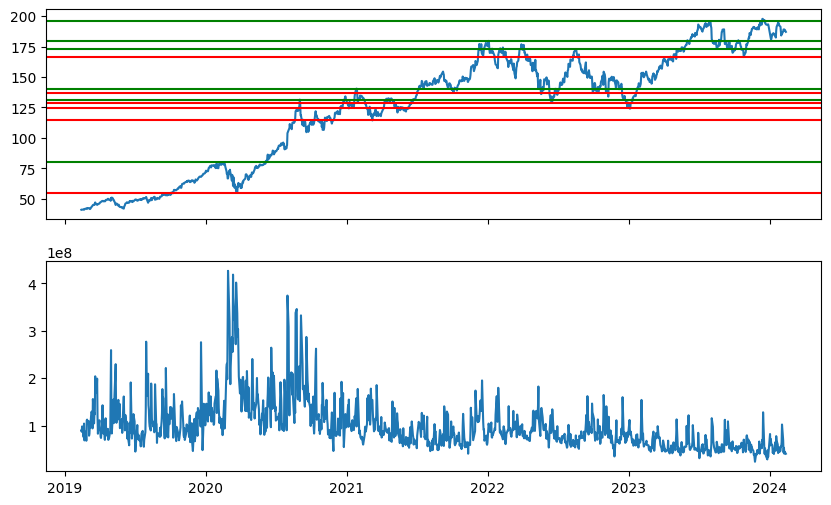

<Figure size 1100x1100 with 0 Axes>

In [100]:
accion = yf.Ticker("AAPL")

ventana_temporal = 60#--> Dias dias para atras y adelante

df = accion.history(period="5y")

soportes,resistencias = buscar_soporte_resistencia(df['Close'],ventana_temporal)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))


plt.figure(figsize=(11,11))
# Ajustar el tamaño de ax1>
ax1.plot(df['Close'])

for soporte,resistencia in zip(soportes,resistencias):
    ax1.axhline(soporte,color = "red")
    ax1.axhline(resistencia,color = "green")




# Ajustar el tamaño de ax1
ax2.plot(df['Volume'])
